<a href="https://colab.research.google.com/github/Homaoa/Regression-for-a-Bike-Sharing-Data-Set/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = "/content/Bike DataSet Cleaned.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,Instant,Season,Year,Month,Holiday,WeekDay,WorkingDay,WeatherSituation,Temperature,FeelingTemperature,Humidity,WindSpeed,Casual,Registered,TotalBikes
0,0,1,1,0,1,0,6,0,2.0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,2,1,0,1,0,0,0,2.0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2,3,1,0,1,0,1,1,1.0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,3,4,1,0,1,0,2,1,1.0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,4,5,1,0,1,0,3,1,1.0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# The column Unnamed is added to the data that I remove.
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head()

,Instant,Season,Year,Month,Holiday,WeekDay,WorkingDay,WeatherSituation,Temperature,FeelingTemperature,Humidity,WindSpeed,Casual,Registered,TotalBikes
0,1,1,0,1,0,6,0,2.0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2.0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1.0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1.0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1.0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Instant             724 non-null    int64  
 1   Season              724 non-null    int64  
 2   Year                724 non-null    int64  
 3   Month               724 non-null    int64  
 4   Holiday             724 non-null    int64  
 5   WeekDay             724 non-null    int64  
 6   WorkingDay          724 non-null    int64  
 7   WeatherSituation    724 non-null    float64
 8   Temperature         724 non-null    float64
 9   FeelingTemperature  724 non-null    float64
 10  Humidity            724 non-null    float64
 11  WindSpeed           724 non-null    float64
 12  Casual              724 non-null    int64  
 13  Registered          724 non-null    int64  
 14  TotalBikes          724 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 85.0 KB


In [ ]:
# The type of categorical variables is back to numeric since I upload the csv file ahain here.
# I fix this again.

In [7]:
df['Season'] = df['Season'] . astype('object')
df['Year'] = df['Year'] . astype('object')
df['Month'] = df['Month'] . astype('object')
df['WeekDay'] = df['WeekDay'] . astype('object')
df['WeatherSituation'] = df['WeatherSituation'] . astype('object')
df['Holiday'] = df['Holiday'] . astype('object')
df['WorkingDay'] = df['WorkingDay'] . astype('object')

## Checking the numeric variables

In [ ]:
# The numeric variables are being normalized by those who collected the data before putting them online.
# So they are all between 0 and 1.

In [8]:
# Now, I check some statistics for numeric variables.
df.describe()

,Instant,Temperature,FeelingTemperature,Humidity,WindSpeed,Casual,Registered,TotalBikes
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,367.375691,0.495993,0.474842,0.628346,0.190547,852.410221,3665.281768,4517.691989
std,211.056022,0.182932,0.162886,0.141840,0.077341,687.837306,1560.743274,1936.255793
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,185.750000,0.337292,0.337891,0.522396,0.134953,316.750000,2506.750000,3193.000000
50%,368.500000,0.501250,0.488627,0.628685,0.180971,722.000000,3669.500000,4551.000000
75%,550.250000,0.655833,0.609544,0.729687,0.233211,1104.500000,4792.750000,5987.500000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# For example, we can see that minimum bike usage was 22 and maximum was 8714. The mean is also 4517.
# We can observe these information for other numeric variables too.

In [9]:
# Now, I want to check the correlation between the numeric variables and the target which is TotalBikes.
df.corr()

<ipython-input-9-51e478c97bca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Instant,Temperature,FeelingTemperature,Humidity,WindSpeed,Casual,Registered,TotalBikes
Instant,1.000000,0.145709,0.147916,0.019450,-0.114268,0.271381,0.658140,0.626908
Temperature,0.145709,1.000000,0.991635,0.126912,-0.161162,0.542228,0.537135,0.625586
FeelingTemperature,0.147916,0.991635,1.000000,0.140051,-0.186785,0.542897,0.541453,0.629305
Humidity,0.019450,0.126912,0.140051,1.000000,-0.250752,-0.078267,-0.091786,-0.101789
WindSpeed,-0.114268,-0.161162,-0.186785,-0.250752,1.000000,-0.166818,-0.217585,-0.234648
Casual,0.271381,0.542228,0.542897,-0.078267,-0.166818,1.000000,0.391252,0.670614
Registered,0.658140,0.537135,0.541453,-0.091786,-0.217585,0.391252,1.000000,0.945051
TotalBikes,0.626908,0.625586,0.629305,-0.101789,-0.234648,0.670614,0.945051,1.000000


In [ ]:
# Based on the table above, it is clear that between the variables related to the weather (Temperature,
# FeelingTemperature, Humidity and WindSpeed), Temperature and FeelingTemprature have higher correlation 
# with TotalBikes. It means when the weather is warmer, more people use bikes.
# I can draw a scatter plot for Temperature to observe this correlation better.

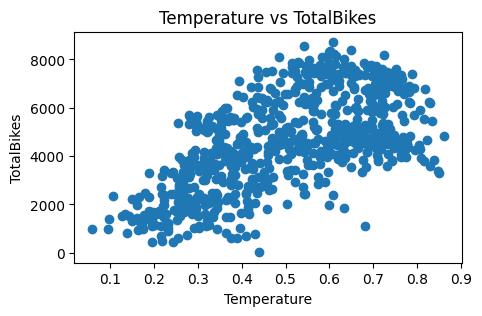

In [11]:
plt.figure(figsize=(5,3))
plt.scatter(df['Temperature'] , df['TotalBikes'])
plt.title('Temperature vs TotalBikes')
plt.xlabel('Temperature')
plt.ylabel('TotalBikes')
plt.show()

<Axes: >

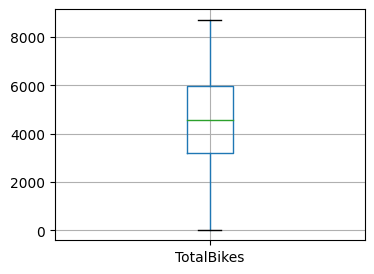

In [10]:
plt.figure(figsize=(4,3))
df.boxplot(column='TotalBikes')

Text(0.5, 1.0, 'WindSpeed')

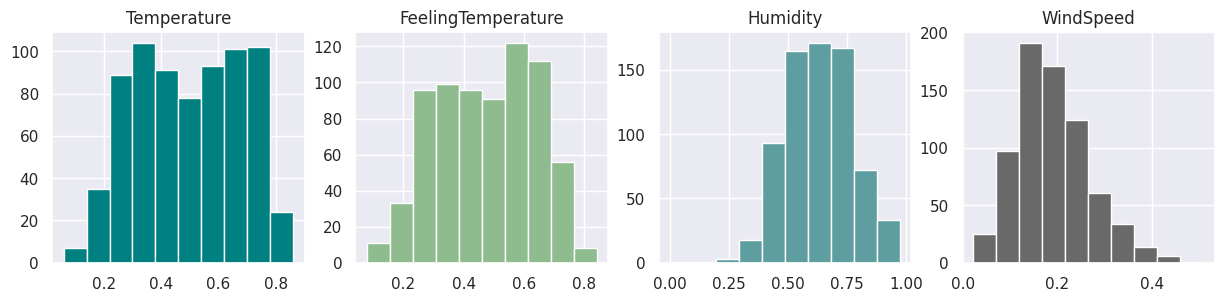

In [ ]:
# Now I draw the histogram graph for the numeric variables.

df_num = df[['Temperature','FeelingTemperature','Humidity','WindSpeed']]
figure, axis = plt.subplots(1,4,figsize=(15, 3))

axis[0].hist(df['Temperature'] , color = 'teal')
axis[0].set_title('Temperature')

axis[1].hist(df['FeelingTemperature'] , color = 'darkseagreen')
axis[1].set_title('FeelingTemperature')

axis[2].hist(df['Humidity'] , color = 'cadetblue')
axis[2].set_title('Humidity')

axis[3].hist(df['WindSpeed'] , color = 'dimgray')
axis[3].set_title('WindSpeed')

In [ ]:
# As I mentioned before, the numeric variables have been normalized and we can see that in their graphs too.

## Checking the categorical variables

In [12]:
df_cat = df[['Season','Year','Month','Holiday','WeekDay','WorkingDay','WeatherSituation']]


 Graph for Season : total = 4


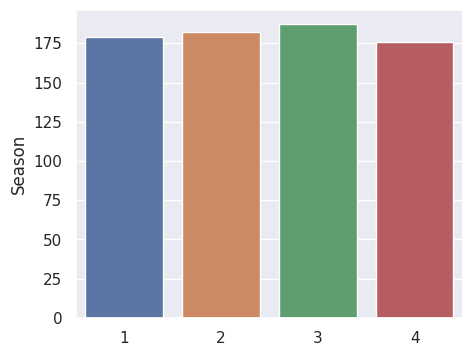


 Graph for Year : total = 2


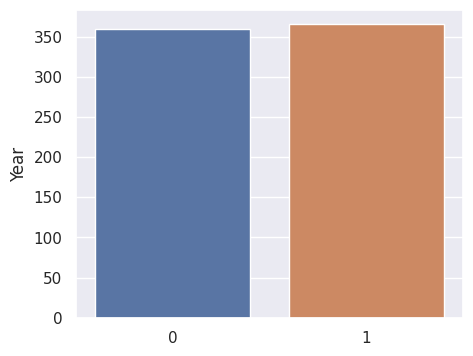


 Graph for Month : total = 12


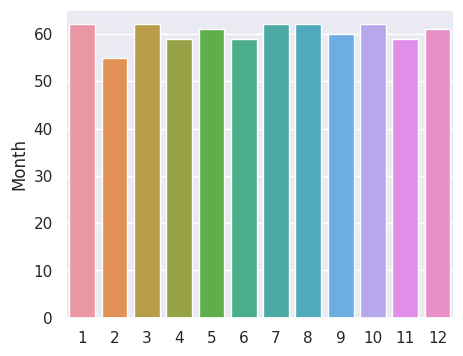


 Graph for Holiday : total = 2


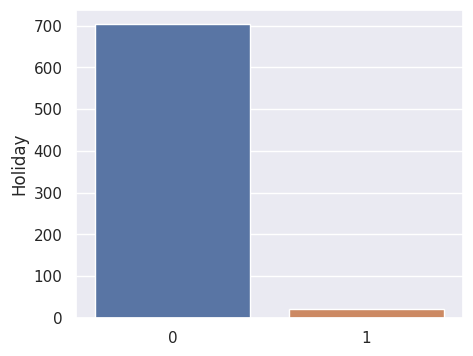


 Graph for WeekDay : total = 7


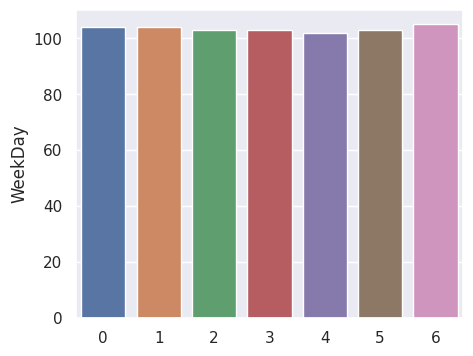


 Graph for WorkingDay : total = 2


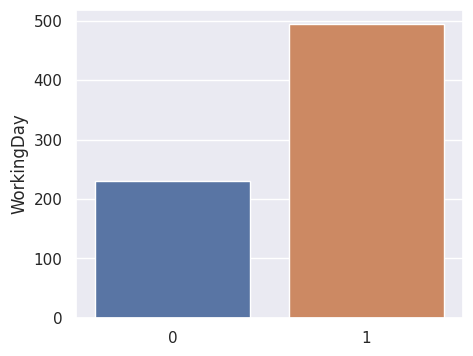


 Graph for WeatherSituation : total = 3


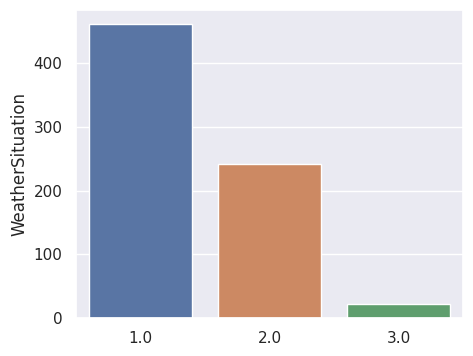

In [13]:
# I make a bar chart for each categorical variable.
sns.set(rc={'figure.figsize':(5,4)})
for i in df_cat.columns:
  num = df_cat[i].value_counts()
  print(f'\n Graph for {i} : total = {len(num)}')
  chart = sns.barplot(x=num.index , y=num)
  chart.set_xticklabels(chart.get_xticklabels())
  plt.show()

In [ ]:
# Some information was predictable even before drawing the bar charts for the categorical variables.
# For example the ratio between sub categories of holidays, working days, weak days, months.
# But for example for the weather situation, it was difficult to know the ratio between different classes of this category,
# but with this bar chart, it is clear now that weather situation number 1 is way more common, and number 3 happens way less. 

In [ ]:
### ANOVA
# Now I use ANOVA to obtain f-score and p-value for variable TotalBikes and each categorical variable.
# Higher f-score means that with change in sub categories, the change in the numeric variable is more significant.
# When f-score is big, it means there is correlation between that categorical and numeric variables.

In [14]:
from scipy import stats

df_anova = df[['Year','TotalBikes']]
grouped_anova = df_anova.groupby(['Year'])
anova_results = stats.f_oneway(grouped_anova.get_group(0)['TotalBikes'], grouped_anova.get_group(1)['TotalBikes'])
print(anova_results)

F_onewayResult(statistic=336.20200172102335, pvalue=6.0659359189178145e-62)


In [18]:
df_anova = df[['Season','TotalBikes']]
grouped_anova = df_anova.groupby(['Season'])
anova_results = stats.f_oneway(grouped_anova.get_group(1)['TotalBikes'], grouped_anova.get_group(2)['TotalBikes'],
                               grouped_anova.get_group(3)['TotalBikes'], grouped_anova.get_group(4)['TotalBikes'])
print(anova_results)

F_onewayResult(statistic=126.64383388282607, pvalue=7.070201748094244e-66)


In [19]:
df_anova = df[['Month','TotalBikes']]
grouped_anova = df_anova.groupby(['Month'])
anova_results = stats.f_oneway(grouped_anova.get_group(1)['TotalBikes'], grouped_anova.get_group(2)['TotalBikes'],
                               grouped_anova.get_group(3)['TotalBikes'], grouped_anova.get_group(4)['TotalBikes'],
                               grouped_anova.get_group(5)['TotalBikes'], grouped_anova.get_group(6)['TotalBikes'],
                               grouped_anova.get_group(7)['TotalBikes'], grouped_anova.get_group(8)['TotalBikes'],
                               grouped_anova.get_group(9)['TotalBikes'], grouped_anova.get_group(10)['TotalBikes'],
                               grouped_anova.get_group(11)['TotalBikes'], grouped_anova.get_group(12)['TotalBikes'],)
print(anova_results)

F_onewayResult(statistic=40.908764059179006, pvalue=1.5936668063780093e-68)


In [20]:
df_anova = df[['Holiday','TotalBikes']]
grouped_anova = df_anova.groupby(['Holiday'])
anova_results = stats.f_oneway(grouped_anova.get_group(0)['TotalBikes'], grouped_anova.get_group(1)['TotalBikes'])
print(anova_results)

F_onewayResult(statistic=3.5463838273856014, pvalue=0.060077115936348305)


In [21]:
df_anova = df[['WeekDay','TotalBikes']]
grouped_anova = df_anova.groupby(['WeekDay'])
anova_results = stats.f_oneway(grouped_anova.get_group(0)['TotalBikes'], grouped_anova.get_group(1)['TotalBikes'],
                               grouped_anova.get_group(2)['TotalBikes'], grouped_anova.get_group(3)['TotalBikes'],
                               grouped_anova.get_group(4)['TotalBikes'], grouped_anova.get_group(5)['TotalBikes'],
                               grouped_anova.get_group(6)['TotalBikes'],)
print(anova_results)

F_onewayResult(statistic=0.7140617100262666, pvalue=0.6383682899007432)


In [22]:
df_anova = df[['WorkingDay','TotalBikes']]
grouped_anova = df_anova.groupby(['WorkingDay'])
anova_results = stats.f_oneway(grouped_anova.get_group(0)['TotalBikes'], grouped_anova.get_group(1)['TotalBikes'])
print(anova_results)

F_onewayResult(statistic=2.941181315376938, pvalue=0.08677665163832853)


In [24]:
df_anova = df[['WeatherSituation','TotalBikes']]
grouped_anova = df_anova.groupby(['WeatherSituation'])
anova_results = stats.f_oneway(grouped_anova.get_group(1)['TotalBikes'], grouped_anova.get_group(2)['TotalBikes'],
                               grouped_anova.get_group(3)['TotalBikes'])
print(anova_results)

F_onewayResult(statistic=39.736266202912276, pvalue=4.2586648444617595e-17)
